In [1]:
import os

import warnings
warnings.filterwarnings("ignore")

# For file handling
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)

# For numerical calculation
import numpy as np
from IPython.display import display

#For Regular Expression
import re, string, unicodedata

from datetime import datetime
# datetime object containing current date and time

# For NLP
import nltk
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
eng_words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words("english")) 

from nltk.stem import PorterStemmer, WordNetLemmatizer
from TurkishStemmer import TurkishStemmer
stemm = PorterStemmer()
lem = WordNetLemmatizer()
stemmer = TurkishStemmer()

#from wordcloud import WordCloud, STOPWORDS

# For Visualization
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = 10, 20


# BERT related packages
import simpletransformers
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ETAACPH\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import math

In [3]:
dataset = pd.read_excel(r"C:\Users\ETAACPH\OneDrive - Ericsson\Project\Vodafone\Dataset\Correct Incidents.xlsx")
dataset.head(3)

,WONUM,REPORTDATE,MONTH,STATUS,FIRST_LOG,LAST_LOG,FULL_LOG,PROBLEM_CATEGORY_NO,PROBLEM_CATEGORY_DESC
0,14118026,2020-09-01 08:17:16,2020/09,CLOSE,5434802877 gsme mağazam tablet üzerinden faturalı taşıma yapmak istiyoruz. kullanıcı bilgi ekran...,ınternet explorer gecmısı temızlenerek ve ınternet ayarları kontrol edılerek denenmelıdır\ngenel...,"ASSIGNED - 01/09/2020 08:34:28 - Kuplemez, Aylin, Vodafone Turkey (External) - Bilgi Teknolojile...",12358,MNT Birey. Açılmayan Hat-VShop
1,14118547,2020-09-01 10:39:14,2020/09,CLOSE,5331630737 gsm noya mnp işlemi yapılmış hat aktif konuma gelmiş ancak şebekesi görüntülenmemekte...,Telefon kapatıp açıldığında sorun düzelecektir. Tanımlamalarıyla ilgili bir problem bulunmamakta...,"ASSIGNED - 01/09/2020 11:45:29 - Artun, Alaz, Vodafone Turkey (External) - 3.Party Çalışanlar: T...",12358,MNT Birey. Açılmayan Hat-VShop
2,14118303,2020-09-01 09:41:24,2020/09,CLOSE,5376624717 gsm için faturasız mnp yapılmış işlem beklemede kalmıştır.İşlem tarafımızdan silinmek...,Bu işlem BTK ya gönderilmiş. İptal edilemez surec beklenmelıdır,"ASSIGNED - 01/09/2020 09:45:52 - Kuplemez, Aylin, Vodafone Turkey (External) - Bilgi Teknolojile...",12358,MNT Birey. Açılmayan Hat-VShop


In [4]:
dataset["FIRST_LOG"].replace('', np.nan, inplace=True)
dataset.dropna(subset=["FIRST_LOG"], inplace=True)

In [5]:
dataset['PROBLEM_CATEGORY_DESC'] = dataset['PROBLEM_CATEGORY_DESC'].str.strip()

In [6]:
# Dropping other columns except input and target variable based on the clients input.
dataset = dataset[["WONUM", "FIRST_LOG","PROBLEM_CATEGORY_DESC"]]
classes = dataset["PROBLEM_CATEGORY_DESC"].unique()
classes

array(['MNT Birey. Açılmayan Hat-VShop', 'Bireysel Fatura Problemi',
       'KUR - Sipariş Sorunları', 'ABONE EKRAN HATALARI',
       'Siparis Sorunlari'], dtype=object)

In [7]:
def remove_na(dataset):
    """
    Dropping rows which have null value
    """
    print("Shape of Dataset before removing NaN:", dataset.shape)
    dataset = dataset.dropna()
    dataset = dataset.reset_index(drop=True)
    print("Shape of Dataset after removing NaN:", dataset.shape)
    
    return dataset

# Removing Punctuation and Number in the dataset
def remove_punct_char_num(data):
    """
    Remove the punctualtions and numbers
    """
    return re.sub('[^abcçdefgğhıijklmnoöprsştuüvyzmi̇z]',' ' ,data)

def remove_url_data(data):
    """
    Removes the URL in data
    """
    return re.sub(r'http\S+','', data)

def perform_word_tokenize(data):
    """
    Convert the sentence into words
    """
    return nltk.word_tokenize(data)

def remove_repeating_words(data):
    """
    Remove repeating words
    """
    return set(data)

def remove_small_words(data):
    """
    Remove the word/keywords whose length is less than 2
    """
    return [i for i in data if len(i) > 2]

def remove_stop_words(data):
    """
    Remove the stop words
    """
    text = [word for word in data if not word in set(stopwords.words("turkish"))]
    return text

def perfrom_word_stemming(data):
    """
    Perform word stemming
    """
    text = [stemmer.stem(word) for word in data]
    return text

def convert_to_sentence(data):
    """
    Convert the tokenized words into sentence
    """
    return " ".join(data)

def convert_to_lower(data):
    """
    Converts data/text to lowercase
    """
    return str(data).lower()


#dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_na)
dataset.drop_duplicates()
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_punct_char_num)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_url_data)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(perform_word_tokenize)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_repeating_words)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_small_words)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_stop_words)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(perfrom_word_stemming)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(convert_to_sentence)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(convert_to_lower)


In [8]:
def looping_df_class(dataset, cls):
    """
    Looping over df for respective class
    """
    print("Inside looping_df_class")
    data = dataset.loc[dataset['PROBLEM_CATEGORY_DESC'] == cls]
    if data.empty:
        print("*****************************************************")
        print("This data is empty:", cls)
        print("*****************************************************")
        return data
    else:
        return data

In [9]:

def vectorising_df(data):
    print("Inside vectorising_df")
    print("Shape of Dataset before Vectorization:",data.shape)
    labels = []
    tfidfVector = TfidfVectorizer(stop_words=stopwords.words('turkish'))
    features = tfidfVector.fit_transform(data["FIRST_LOG"]).toarray()
    labels = data.PROBLEM_CATEGORY_DESC
    #print(labels)
    vectorised_df = pd.DataFrame()
    vectorised_df = pd.DataFrame(features, columns=tfidfVector.get_feature_names())
    vectorised_df["WONUM"] = data["WONUM"]
    vectorised_df["FIRST_LOG"] = data["FIRST_LOG"]
    vectorised_df["PROBLEM_CATEGORY_DESC"] = labels
    
    return vectorised_df

In [10]:
def performing_K_means(data, K):
    
    cluster_df = pd.DataFrame()
    y = data["PROBLEM_CATEGORY_DESC"]
    #input_data = data.loc[:, data.columns not in ["WONUM","PROBLEM_CATEGORY_DESC"]]
    input_data = data.loc[:, ~data.columns.isin(["WONUM","FIRST_LOG", "PROBLEM_CATEGORY_DESC"])]
    
    #print(input_data.columns)
    #print(type(input_data))
    
    clusters = KMeans(n_clusters=int(K)).fit_predict(input_data)
    #print("Clusters", clusters)
    
    cluster_df = cluster_df.join(input_data)
    cluster_df["WONUM"] = data["WONUM"]
    cluster_df["FIRST_LOG"] = data["FIRST_LOG"]
    cluster_df["PROBLEM_CATEGORY_DESC"] = y
    cluster_df["Bucket"] = clusters
    return cluster_df

In [11]:
def calc_distance(x1, y1, a, b, c):
  d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
  return d

def perform_clustering(data):
    print("Inside Clustering")
    
    distance_of_points_from_line = []
    y = data["PROBLEM_CATEGORY_DESC"]
    #x = data.loc[:, data.columns not in ["WONUM","PROBLEM_CATEGORY_DESC"]]
    x = data.loc[:, ~data.columns.isin(["WONUM","FIRST_LOG","PROBLEM_CATEGORY_DESC"])]
    
    #x = data.drop(["PROBLEM_CATEGORY_DESC"], axis = 1) 
    #print(x)
    dist_points_from_cluster_center = []
    K = range(1,15)
    for no_of_clusters in K:
        k_model = KMeans(n_clusters=no_of_clusters)
        k_model.fit(x)
        dist_points_from_cluster_center.append(k_model.inertia_)
        
    plt.plot(K, dist_points_from_cluster_center)
    
    plt.plot(K, dist_points_from_cluster_center)
    plt.plot([K[0], K[13]], [dist_points_from_cluster_center[0], 
                        dist_points_from_cluster_center[13]], 'ro-')
    
    x = [K[0], K[13]]
    y = [dist_points_from_cluster_center[0], dist_points_from_cluster_center[13]]

    # Calculate the coefficients. This line answers the initial question. 
    coefficients = np.polyfit(x, y, 1)

    # Print the findings
    print('a =', coefficients[0])
    print('b =', coefficients[1])

    # Let's compute the values of the line...
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(0,4,100)
    y_axis = polynomial(x_axis)
    
    a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[13]
    b = K[13] - K[0]
    c1 = K[0] * dist_points_from_cluster_center[13]
    c2 = K[13] * dist_points_from_cluster_center[0]
    c = c1 - c2
    
    for k in range(14):
        distance_of_points_from_line.append(
        calc_distance(K[k], dist_points_from_cluster_center[k], a, b, c))
    
    plt.plot(K, distance_of_points_from_line)
    plt.show()
    
    K = distance_of_points_from_line.index(max(distance_of_points_from_line)) + 1
    print("\n########### Optimum K-Value for the Class:", K)
    
    # Calling a function to perform clustering and return clustered dataset
    
    clustered_df = performing_K_means(data, K)
    
    return clustered_df

Inside vectorising_df
Shape of Dataset before Vectorization: (1485, 3)
*************************** MNT Birey. Açılmayan Hat-VShop ***************************
Inside looping_df_class
Shape of Filtered Dataset: (201, 3705)
Inside Clustering
a = -4.077072790697604
b = 158.27714733074922


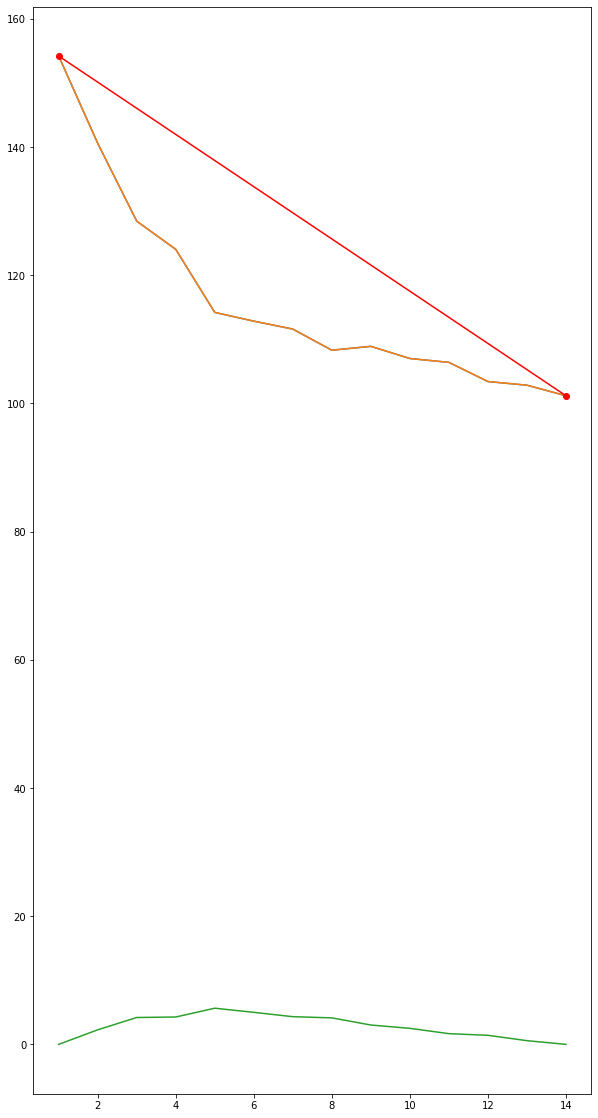


########### Optimum K-Value for the Class: 5
201
*************************** Bireysel Fatura Problemi ***************************
Inside looping_df_class
Shape of Filtered Dataset: (262, 3705)
Inside Clustering
a = -2.196916372685311
b = 229.936458892062


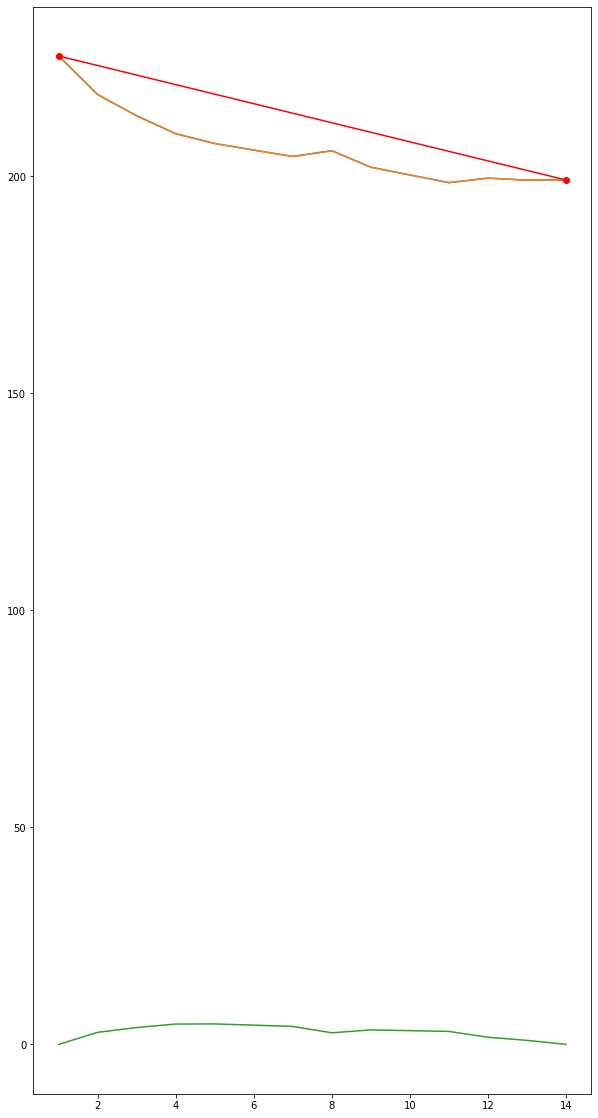


########### Optimum K-Value for the Class: 5
262
*************************** KUR - Sipariş Sorunları ***************************
Inside looping_df_class
Shape of Filtered Dataset: (354, 3705)
Inside Clustering
a = -7.054809300661737
b = 320.5270775961835


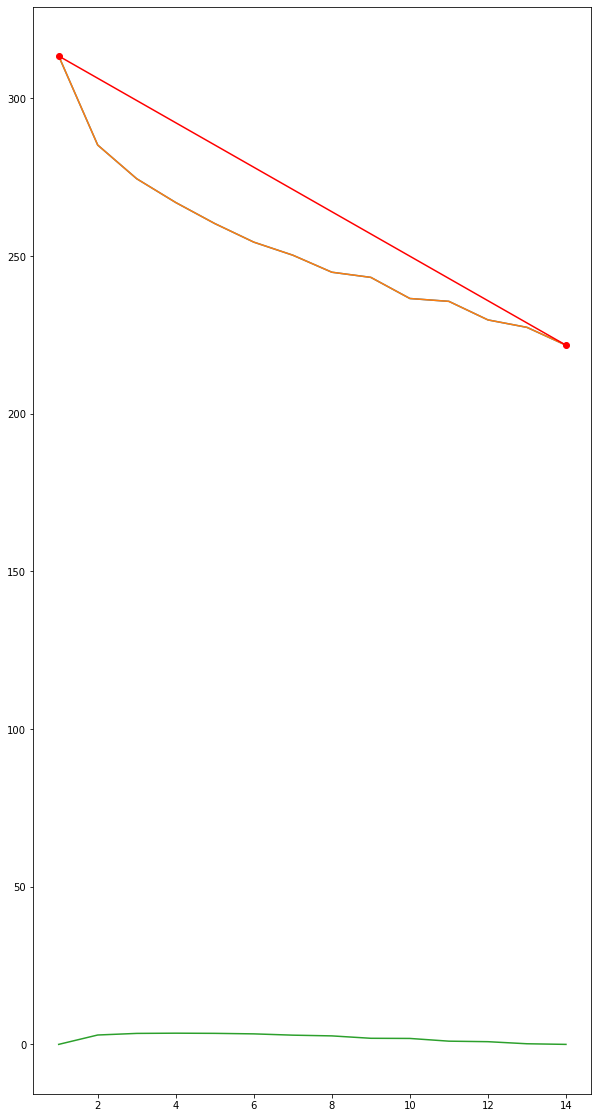


########### Optimum K-Value for the Class: 4
354
*************************** ABONE EKRAN HATALARI ***************************
Inside looping_df_class
Shape of Filtered Dataset: (462, 3705)
Inside Clustering
a = -3.9909072121271034
b = 420.5459805162773


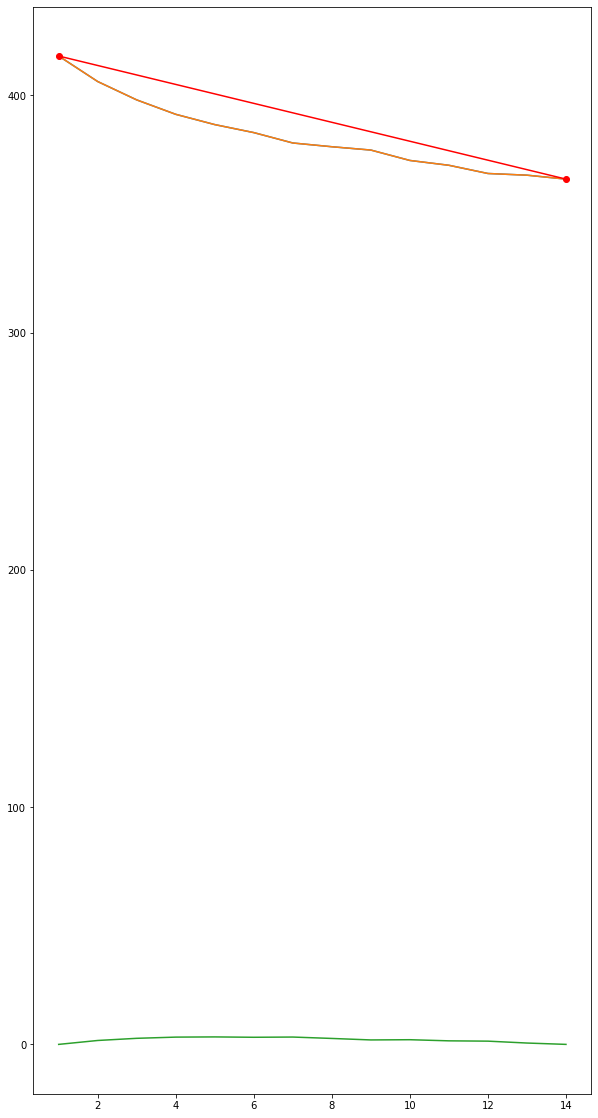


########### Optimum K-Value for the Class: 5
462
*************************** Siparis Sorunlari ***************************
Inside looping_df_class
Shape of Filtered Dataset: (201, 3705)
Inside Clustering
a = -5.872212354069788
b = 183.02977370670905


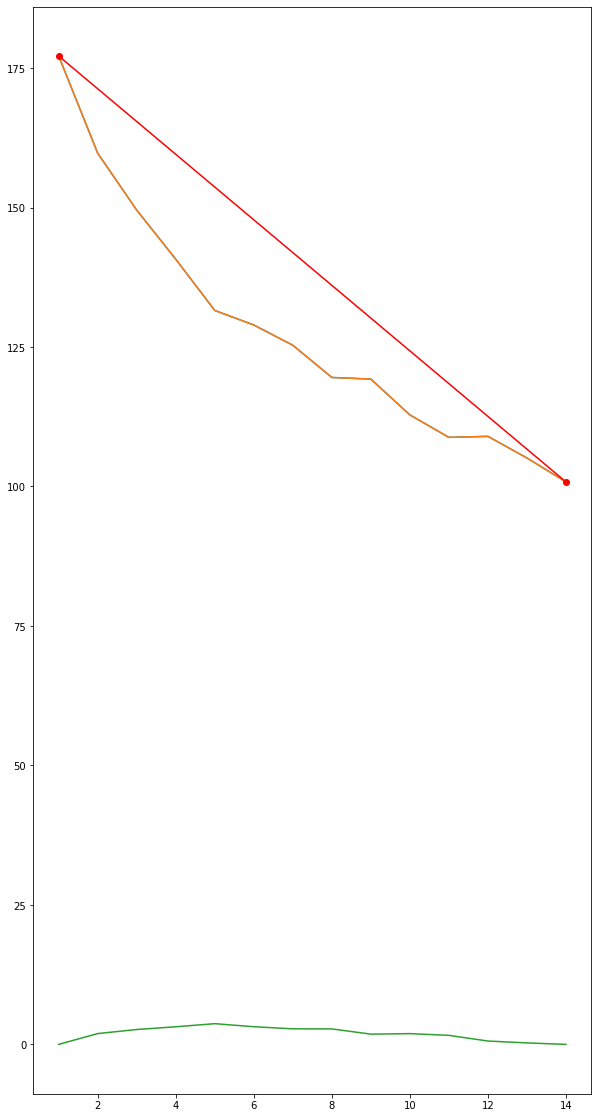


########### Optimum K-Value for the Class: 5
201


In [12]:
clustured_data = pd.DataFrame()
vectorised_df = vectorising_df(dataset)
   
for cls in classes:
    
    print("***************************",cls,"***************************")
    # Filtering df as per class
    classes_df = looping_df_class(vectorised_df, cls)
    print("Shape of Filtered Dataset:",classes_df.shape)
    clustered_df = perform_clustering(classes_df)
    print(len(clustered_df["Bucket"]))
    
    # Combining the dataframe
    clustured_data = pd.concat([clustured_data, clustered_df], ignore_index=True, sort=False)

In [13]:
print("Shape of Dataset:", dataset.shape)
print("Shape of dataset before clustering:",vectorised_df.shape)
print("Shape of dataset after clustering:",clustured_data.shape)

Shape of Dataset: (1485, 3)
Shape of dataset before clustering: (1485, 3705)
Shape of dataset after clustering: (1480, 3706)


In [14]:
dataset["PROBLEM_CATEGORY_DESC"].value_counts()

ABONE EKRAN HATALARI              467
KUR - Sipariş Sorunları           354
Bireysel Fatura Problemi          262
Siparis Sorunlari                 201
MNT Birey. Açılmayan Hat-VShop    201
Name: PROBLEM_CATEGORY_DESC, dtype: int64

In [15]:
clustured_data["PROBLEM_CATEGORY_DESC"].value_counts()

ABONE EKRAN HATALARI              462
KUR - Sipariş Sorunları           354
Bireysel Fatura Problemi          262
Siparis Sorunlari                 201
MNT Birey. Açılmayan Hat-VShop    201
Name: PROBLEM_CATEGORY_DESC, dtype: int64

In [16]:
dataset["PROBLEM_CATEGORY_DESC"].unique()

array(['MNT Birey. Açılmayan Hat-VShop', 'Bireysel Fatura Problemi',
       'KUR - Sipariş Sorunları', 'ABONE EKRAN HATALARI',
       'Siparis Sorunlari'], dtype=object)

In [17]:
clustured_data.columns

Index(['aabone', 'aaldıg', 'aalmaktadir', 'abnoe', 'abobe', 'abobne', 'aboe',
       'aboen', 'aboenmız', 'aboenı',
       ...
       'şncelenme', 'şstedik', 'şter', 'şuan', 'şuanki', 'şım', 'WONUM',
       'FIRST_LOG', 'PROBLEM_CATEGORY_DESC', 'Bucket'],
      dtype='object', length=3706)

In [18]:
# Dropping other columns except input and target variable based on the clients input.
new_data = clustured_data[["WONUM", "FIRST_LOG","PROBLEM_CATEGORY_DESC", "Bucket"]]
new_data.head(3)

,WONUM,FIRST_LOG,PROBLEM_CATEGORY_DESC,Bucket
0,14118026.0,abone işle mağaza kitlenmek istiyor ekran iler üzer etmemek abone fatura yapmak memnuni eder sor...,MNT Birey. Açılmayan Hat-VShop,0
1,14118547.0,bone yapıl olarak şebeke oluşturul pre gsm no aktif görülmek fakat başlatıl eder görülmek alamam...,MNT Birey. Açılmayan Hat-VShop,0
2,14118303.0,bekleme işle yapıl işle ha gsm silinme yardım alınıyor taraf istendik silinmek kal eder eklenece...,MNT Birey. Açılmayan Hat-VShop,1


In [19]:
new_data["PROBLEM_CATEGORY_DESC"].value_counts().median()

262.0

In [20]:
rec_count = new_data["PROBLEM_CATEGORY_DESC"].value_counts().min()

In [21]:
final_data = pd.DataFrame()
for cls in new_data["PROBLEM_CATEGORY_DESC"].unique():
    print("********",cls,"********")
    data = new_data.loc[new_data['PROBLEM_CATEGORY_DESC'] == cls]
    bucket_window = len(data["Bucket"].unique())
    datapoints = int(rec_count/bucket_window)
    print(datapoints)
    print("For each buckets data point should be:",datapoints)
    for bucket in data["Bucket"].unique():
        bucket_data = pd.DataFrame()
        temp_bucket = pd.DataFrame()
        bucket_data = data.loc[data['Bucket'] == bucket]
        if len(bucket_data) >= datapoints:
            temp_bucket = bucket_data.sample(int(datapoints))
            print("Shape of bucket data:", temp_bucket.shape )
        elif len(bucket_data) <= datapoints:
            temp_bucket = bucket_data
            print("Shape of bucket data:", temp_bucket.shape )
        
        final_data = pd.concat([final_data, temp_bucket], ignore_index=True, sort=False)


******** MNT Birey. Açılmayan Hat-VShop ********
40
For each buckets data point should be: 40
Shape of bucket data: (40, 4)
Shape of bucket data: (29, 4)
Shape of bucket data: (29, 4)
Shape of bucket data: (13, 4)
Shape of bucket data: (16, 4)
******** Bireysel Fatura Problemi ********
40
For each buckets data point should be: 40
Shape of bucket data: (40, 4)
Shape of bucket data: (40, 4)
Shape of bucket data: (33, 4)
Shape of bucket data: (5, 4)
Shape of bucket data: (10, 4)
******** KUR - Sipariş Sorunları ********
50
For each buckets data point should be: 50
Shape of bucket data: (50, 4)
Shape of bucket data: (50, 4)
Shape of bucket data: (50, 4)
Shape of bucket data: (36, 4)
******** ABONE EKRAN HATALARI ********
40
For each buckets data point should be: 40
Shape of bucket data: (40, 4)
Shape of bucket data: (40, 4)
Shape of bucket data: (40, 4)
Shape of bucket data: (40, 4)
Shape of bucket data: (27, 4)
******** Siparis Sorunlari ********
40
For each buckets data point should be: 

In [22]:
final_data["PROBLEM_CATEGORY_DESC"].value_counts()

ABONE EKRAN HATALARI              187
KUR - Sipariş Sorunları           186
Siparis Sorunlari                 156
Bireysel Fatura Problemi          128
MNT Birey. Açılmayan Hat-VShop    127
Name: PROBLEM_CATEGORY_DESC, dtype: int64

In [23]:
final_data["PROBLEM_CATEGORY_DESC"].value_counts(normalize=True)

ABONE EKRAN HATALARI              0.238520
KUR - Sipariş Sorunları           0.237245
Siparis Sorunlari                 0.198980
Bireysel Fatura Problemi          0.163265
MNT Birey. Açılmayan Hat-VShop    0.161990
Name: PROBLEM_CATEGORY_DESC, dtype: float64

In [24]:
final_data.head(3)

,WONUM,FIRST_LOG,PROBLEM_CATEGORY_DESC,Bucket
0,14137865.0,,MNT Birey. Açılmayan Hat-VShop,0
1,14121156.0,mnp uster statusunde kalmıs yapmıs ıslemı acık fkat meerhap,MNT Birey. Açılmayan Hat-VShop,0
2,14148949.0,tamamlan hata bekleme işle umar üzerindn olrak au ayi evrak tamamlayamadıg biyometrig sağlan olu...,MNT Birey. Açılmayan Hat-VShop,0


In [25]:
old_data = dataset
dataset = final_data[[ "FIRST_LOG","PROBLEM_CATEGORY_DESC"]]
dataset.head(3)

,FIRST_LOG,PROBLEM_CATEGORY_DESC
0,,MNT Birey. Açılmayan Hat-VShop
1,mnp uster statusunde kalmıs yapmıs ıslemı acık fkat meerhap,MNT Birey. Açılmayan Hat-VShop
2,tamamlan hata bekleme işle umar üzerindn olrak au ayi evrak tamamlayamadıg biyometrig sağlan olu...,MNT Birey. Açılmayan Hat-VShop


In [26]:
# Converting the Classses(String) to Factors(Integer)
dataset["Category_ID"] = dataset["PROBLEM_CATEGORY_DESC"].factorize()[0]

In [27]:
from io import StringIO
category_id_df = dataset[['PROBLEM_CATEGORY_DESC', 'Category_ID']].drop_duplicates().sort_values('Category_ID')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Category_ID', 'PROBLEM_CATEGORY_DESC']].values)

******************************Before Normalizing the Data******************************


<Figure size 576x432 with 0 Axes>

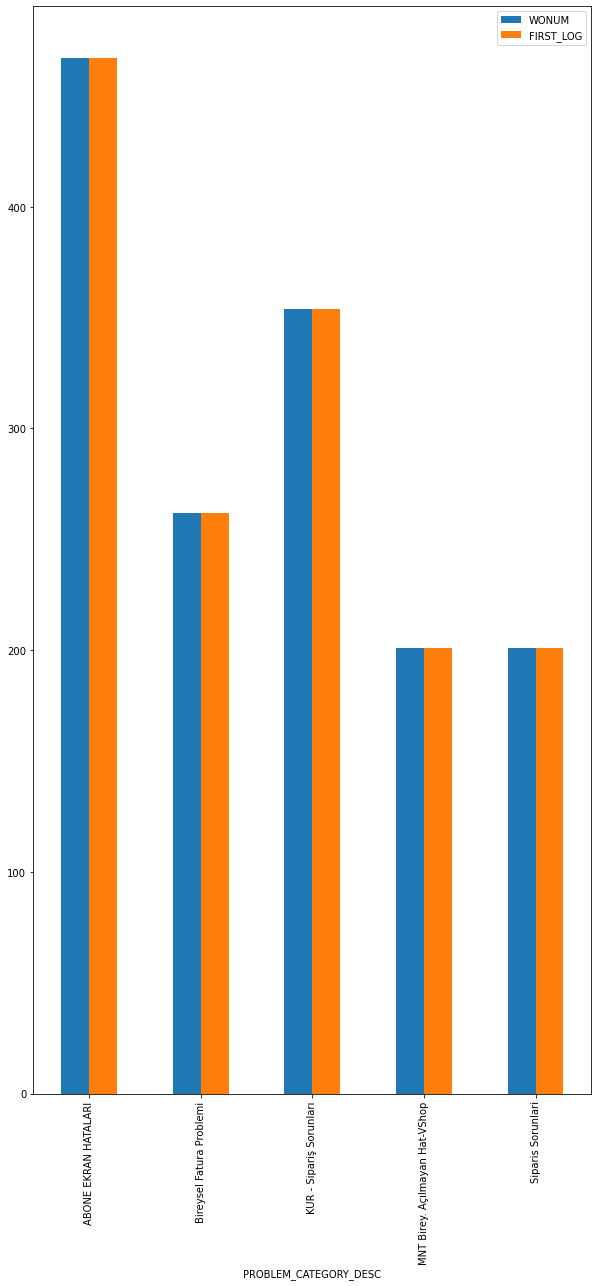

In [28]:
# Plotting a graph to visulalize the Class Distribution
print("******************************Before Normalizing the Data******************************")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
old_data.groupby('PROBLEM_CATEGORY_DESC').count().plot.bar(ylim=0)
plt.show()

******************************After Normalizing the Data******************************


<Figure size 576x432 with 0 Axes>

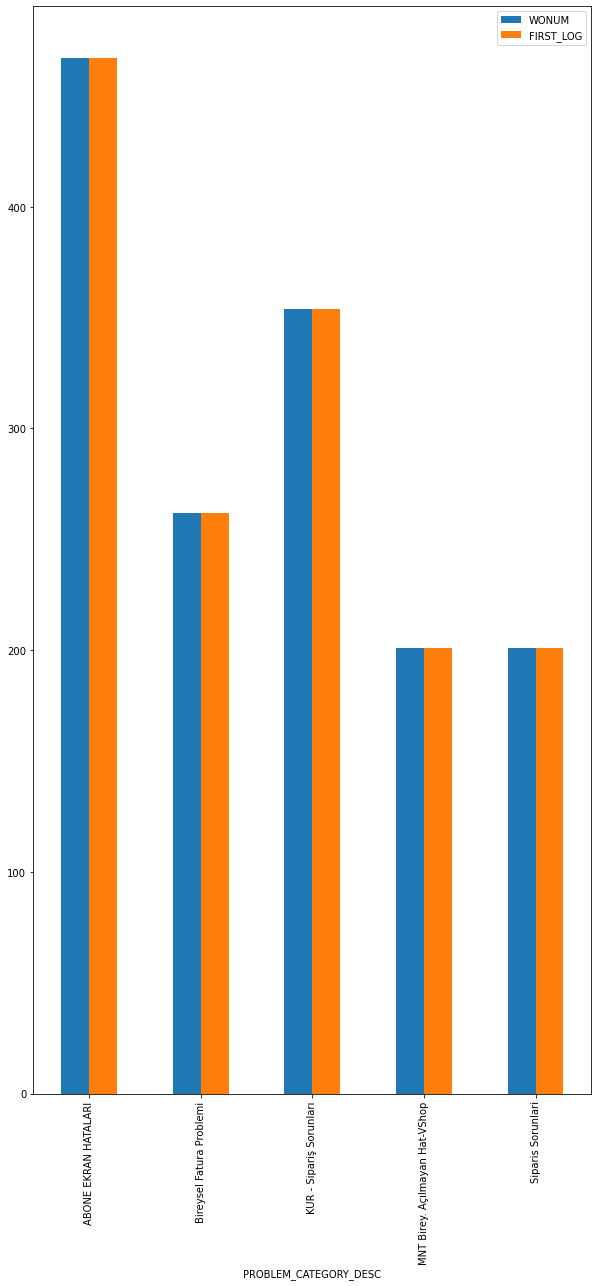

In [29]:
# Plotting a graph to visulalize the Class Distribution
import matplotlib.pyplot as plt
print("******************************After Normalizing the Data******************************")
fig = plt.figure(figsize=(8,6))
old_data.groupby('PROBLEM_CATEGORY_DESC').count().plot.bar(ylim=0)
plt.show()

******************************After Normalizing the Data******************************


<Figure size 576x432 with 0 Axes>

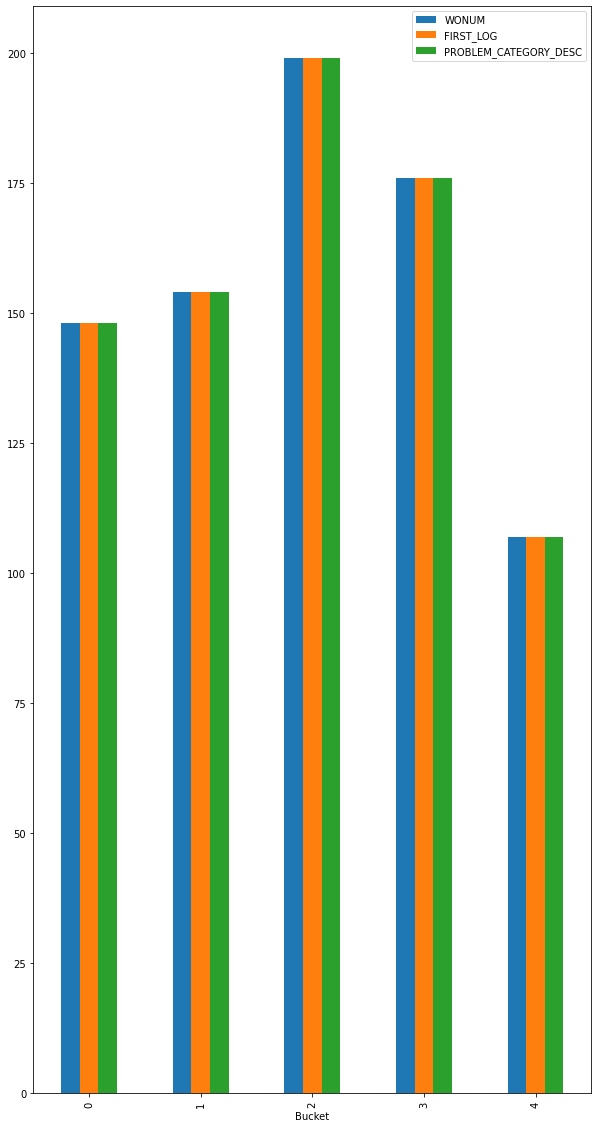

In [30]:
# Plotting a graph to visulalize the Class Distribution
import matplotlib.pyplot as plt
print("******************************After Normalizing the Data******************************")
fig = plt.figure(figsize=(8,6))
final_data.groupby('Bucket').count().plot.bar(ylim=0)
plt.show()

<AxesSubplot:xlabel='PROBLEM_CATEGORY_DESC'>

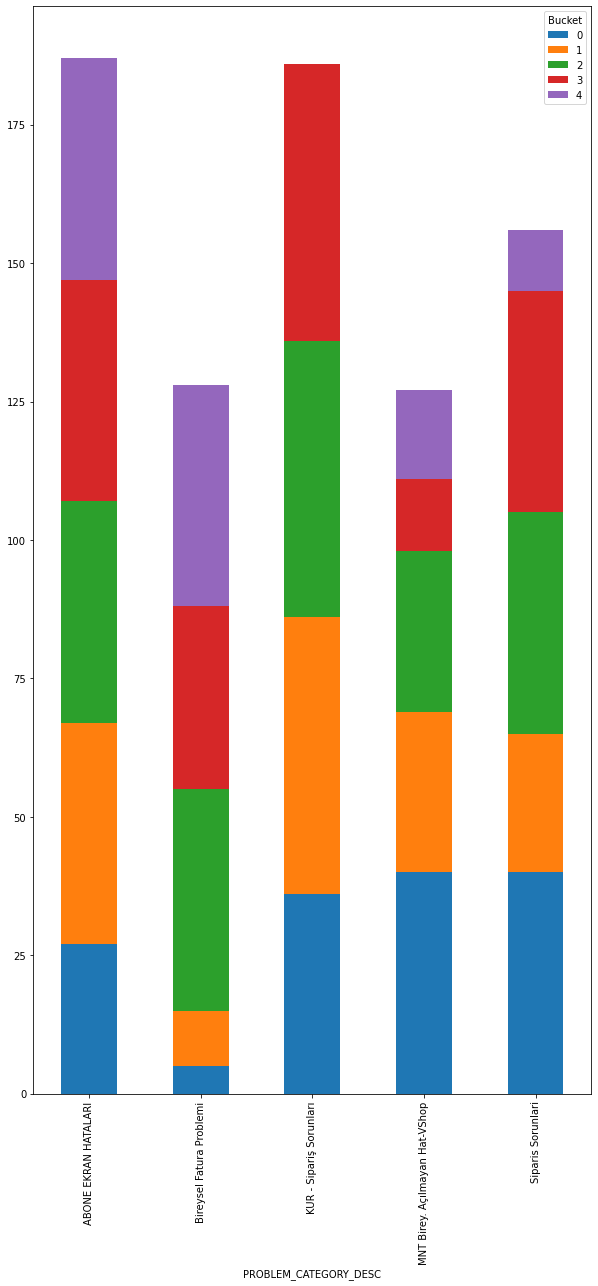

In [31]:
final_data.groupby(['PROBLEM_CATEGORY_DESC', 'Bucket']).size().unstack().plot(kind='bar', stacked=True)

In [32]:
"""
Converting the Text Data into Integer to feed to Model
"""

from sklearn.feature_extraction.text import TfidfVectorizer

#mindf = 0.1% max_df = 0.2/0.8
tfidfVector = TfidfVectorizer(max_features=10000,stop_words=stopwords.words('turkish'),use_idf=True,ngram_range=(1, 1))

features = tfidfVector.fit_transform(dataset["FIRST_LOG"]).toarray()
labels = dataset.PROBLEM_CATEGORY_DESC
print("\n The shape of features generated from TF-IDF is : ",features.shape)


 The shape of features generated from TF-IDF is :  (784, 2344)


In [33]:
"""
Utlizing sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the classes
"""

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for FIRST_LOG, Category_ID in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == Category_ID)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfVector.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(FIRST_LOG))
    print(" Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print(" Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("\n*****************************************************************\n")

# 'ABONE EKRAN HATALARI':
 Most correlated unigrams:
. gelm
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'Bireysel Fatura Problemi':
 Most correlated unigrams:
. gelm
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'KUR - Sipariş Sorunları':
 Most correlated unigrams:
. gelm
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'MNT Birey. Açılmayan Hat-VShop':
 Most correlated unigrams:
. gelm
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'Siparis Sorunlari':
 Most correlated unigrams:
. gelm
. şım
 Most correlated bigrams:
. 

*****************************************************************



In [34]:
# Defining input and output variable for Model
X_train = features
Y_train = labels

0:	learn: 1.6053246	total: 82.8ms	remaining: 1m 22s
1:	learn: 1.6009808	total: 108ms	remaining: 53.7s
2:	learn: 1.5960080	total: 132ms	remaining: 43.9s
3:	learn: 1.5925000	total: 157ms	remaining: 39.1s
4:	learn: 1.5888195	total: 182ms	remaining: 36.2s
5:	learn: 1.5845553	total: 206ms	remaining: 34.2s
6:	learn: 1.5804639	total: 231ms	remaining: 32.7s
7:	learn: 1.5770858	total: 256ms	remaining: 31.7s
8:	learn: 1.5731294	total: 280ms	remaining: 30.8s
9:	learn: 1.5688189	total: 309ms	remaining: 30.6s
10:	learn: 1.5654736	total: 347ms	remaining: 31.2s
11:	learn: 1.5617010	total: 372ms	remaining: 30.7s
12:	learn: 1.5575846	total: 397ms	remaining: 30.2s
13:	learn: 1.5534624	total: 422ms	remaining: 29.7s
14:	learn: 1.5496792	total: 448ms	remaining: 29.4s
15:	learn: 1.5465091	total: 472ms	remaining: 29.1s
16:	learn: 1.5427517	total: 497ms	remaining: 28.7s
17:	learn: 1.5391604	total: 530ms	remaining: 28.9s
18:	learn: 1.5360418	total: 561ms	remaining: 29s
19:	learn: 1.5322373	total: 586ms	remaini

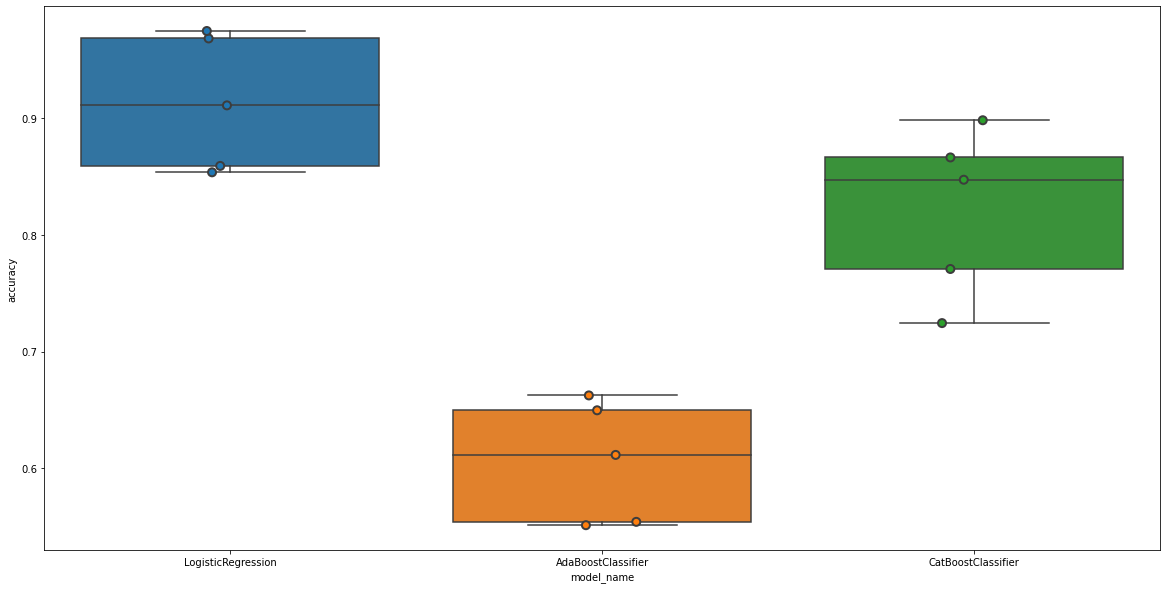

In [35]:
"""
Training multiple model and observe the better performing alogorithm
"""

os.system('cls')
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, naive_bayes, svm


# Ensemble's
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgbm
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier
# Include SVC

fig = plt.figure(figsize=(20 ,10))

lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': len(dataset["PROBLEM_CATEGORY_DESC"].unique()),
    'metric': ['multi_error'],
    "learning_rate": 0.05,
     "num_leaves": 60,
     "max_depth": 9,
     "feature_fraction": 0.45,
     "bagging_fraction": 0.3,
     "reg_alpha": 0.15,
     "reg_lambda": 0.15,
#      "min_split_gain": 0,
      "min_child_weight": 0
                }

#Converting the dataset in proper LGB format
d_train=lgbm.Dataset(X_train, label=Y_train)

models = [
    #RandomForestClassifier(n_estimators=200, max_depth=30, random_state=0),
    #svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True),
    #LinearSVC(),
    #MultinomialNB(),
    LogisticRegression(random_state=0),
    #SGDClassifier(),
    #lgbm.train(lgbm_params,d_train,100),
    #XGBClassifier(base_score=0.5, booster='gbtree', objective="multi:softmax"),
    AdaBoostClassifier(),
    CatBoostClassifier(learning_rate=0.003,loss_function='MultiClass')
]


"""

#svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    
lgbm(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='multiclass', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=5, nthread=None, objective='multi:softmax', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1),
    AdaBoostClassifier(classes=dataset["PROBLEM_CATEGORY_DESC"].unique())
    #CatBoostClassifier(iterations=50,learning_rate=0.003,custom_metric=['Logloss','AUC:hints=skip_train~false'],random_strength=0.1,depth=8,loss_function='MultiClass',eval_metric='Accuracy',leaf_estimation_method='Newton')


"""

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy,model))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy','model'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [36]:
# Accuracy of Model
cv_df.groupby('model_name').accuracy.mean()

model_name
AdaBoostClassifier    0.605798
CatBoostClassifier    0.821305
LogisticRegression    0.913196
Name: accuracy, dtype: float64

In [37]:
# Accuracy of Model
g1 = cv_df.groupby(['model_name'],as_index=False).accuracy.mean()
temp_df1 = pd.DataFrame(g1)
temp_df1

temp_df1 = temp_df1.reset_index()
temp_df1 = temp_df1.drop(['index'],axis=1)
temp_df1

,model_name,accuracy
0,AdaBoostClassifier,0.605798
1,CatBoostClassifier,0.821305
2,LogisticRegression,0.913196


In [38]:
var = temp_df1[temp_df1.accuracy == temp_df1.accuracy.max()]
var = var.reset_index()
var = var.drop(['index'],axis=1)
model_name = var["model_name"][0]
print("Model Name:", model_name)

Model Name: LogisticRegression


In [39]:
filter_df = cv_df.loc[cv_df["model_name"] == model_name]
print("Model:",filter_df["model"].unique()[0])

Model: LogisticRegression(random_state=0)


In [40]:
selected_model = filter_df["model"].unique()[0]

In [41]:
cv_df

,model_name,fold_idx,accuracy,model
0,LogisticRegression,0,0.853503,LogisticRegression(random_state=0)
1,LogisticRegression,1,0.910828,LogisticRegression(random_state=0)
2,LogisticRegression,2,0.968153,LogisticRegression(random_state=0)
3,LogisticRegression,3,0.974522,LogisticRegression(random_state=0)
4,LogisticRegression,4,0.858974,LogisticRegression(random_state=0)
5,AdaBoostClassifier,0,0.649682,AdaBoostClassifier()
6,AdaBoostClassifier,1,0.554140,AdaBoostClassifier()
7,AdaBoostClassifier,2,0.611465,AdaBoostClassifier()
8,AdaBoostClassifier,3,0.662420,AdaBoostClassifier()
9,AdaBoostClassifier,4,0.551282,AdaBoostClassifier()


In [42]:
# LR Model
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
# Defining the LR algo
model = selected_model

model = CalibratedClassifierCV(model) 

#clf.fit(X_train, y_train)
#y_proba = clf.predict_proba(X_test)
# Splitting the Dataset to Traing and Test
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dataset.index, test_size=0.30, random_state=0, stratify=labels)

# Fitting the data to model
model.fit(X_train, y_train)

# Predicting the PROBLEM_CATEGORY_DESCRIPTION for Test data
y_pred = model.predict(X_test)

# Predicting the PROBLEM_CATEGORY_DESCRIPTION for Train data
train_pred = model.predict(X_train)

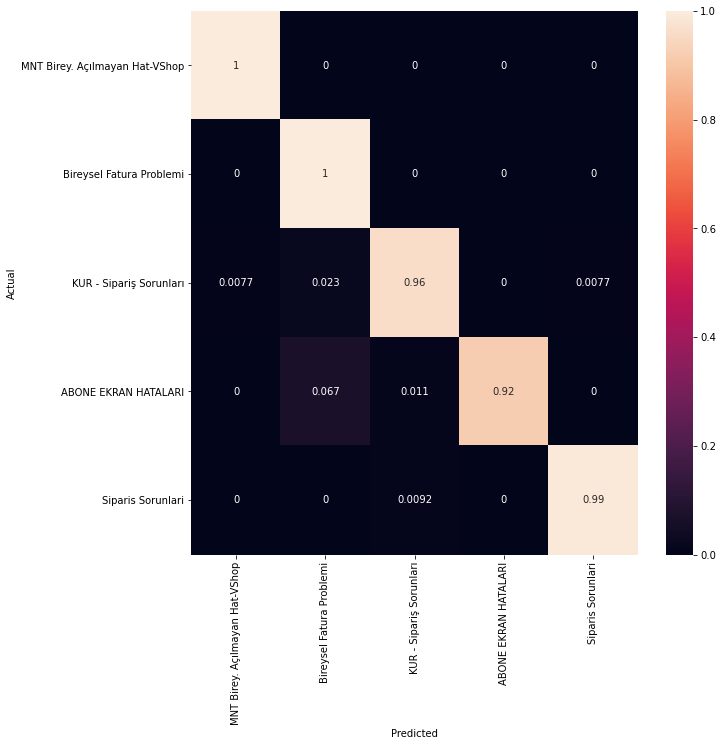

In [43]:
"""
Plotting the Confustion Matrix in the form of Heat Matrix
"""

from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(y_train, train_pred)
fig, ax = plt.subplots(figsize=(10,10))
cmn = conf_mat1.astype('float') / conf_mat1.sum(axis=1)[:, np.newaxis]

"""
# Uncomment this codeblock to get the data in the integer form

sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
"""

sns.heatmap(cmn, annot=True, xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
# Generating the Classification Report on Train Data
from sklearn import metrics
print(metrics.classification_report(y_train, train_pred, target_names=dataset["PROBLEM_CATEGORY_DESC"].unique()))

                                precision    recall  f1-score   support

MNT Birey. Açılmayan Hat-VShop       0.99      1.00      1.00       131
      Bireysel Fatura Problemi       0.91      1.00      0.95        89
       KUR - Sipariş Sorunları       0.98      0.96      0.97       130
          ABONE EKRAN HATALARI       1.00      0.92      0.96        89
             Siparis Sorunlari       0.99      0.99      0.99       109

                      accuracy                           0.98       548
                     macro avg       0.98      0.97      0.97       548
                  weighted avg       0.98      0.98      0.98       548



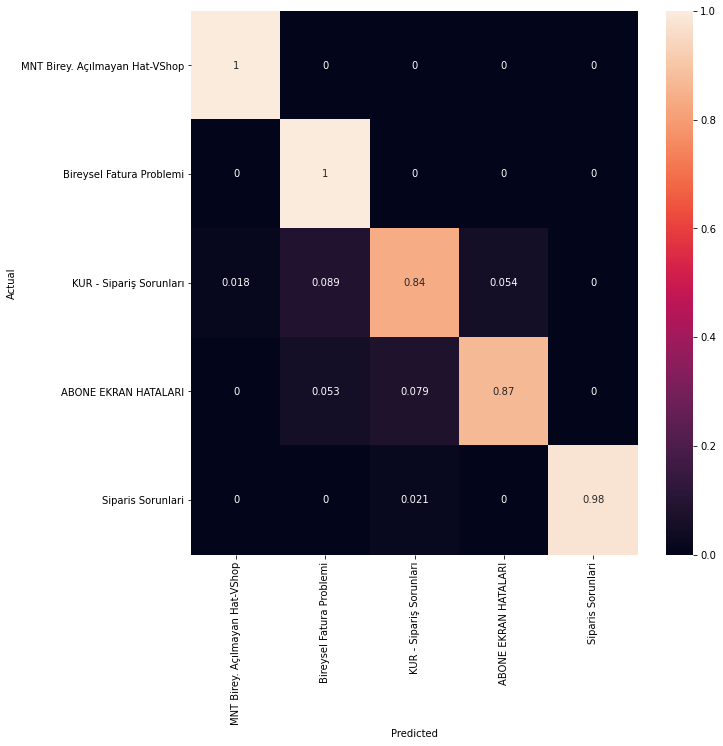

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
cmn = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

"""
# Uncomment this codeblock to get the data in the integer form

sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
"""

sns.heatmap(cmn, annot=True, xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
# Generating the Classification Report on Test Data
print(metrics.classification_report(y_test, y_pred, target_names=dataset["PROBLEM_CATEGORY_DESC"].unique()))

                                precision    recall  f1-score   support

MNT Birey. Açılmayan Hat-VShop       0.98      1.00      0.99        56
      Bireysel Fatura Problemi       0.85      1.00      0.92        39
       KUR - Sipariş Sorunları       0.92      0.84      0.88        56
          ABONE EKRAN HATALARI       0.92      0.87      0.89        38
             Siparis Sorunlari       1.00      0.98      0.99        47

                      accuracy                           0.94       236
                     macro avg       0.93      0.94      0.93       236
                  weighted avg       0.94      0.94      0.94       236



In [47]:
import pickle

# Declaring the File Name
model_filename = r"C:/Users/ETAACPH/OneDrive - Ericsson/Project/Vodafone/Dev/model/Bal_LR_pickle_model_5class.pickle"
tfidf_filename = r"C:/Users/ETAACPH/OneDrive - Ericsson/Project/Vodafone/Dev/model/Bal_TFIDF_vector_5class.pickle"


# Creating and Saving the pickle file for future useage
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
    
with open(tfidf_filename, 'wb') as file:
    pickle.dump(tfidfVector, file)

In [48]:
def data_preprocessing(text):
    """
    During model inference, the test data should undergo the preprocessing steps followed during the training of model
    """
    text = remove_punct_char_num(text)
    text = remove_url_data(text)
    text = perform_word_tokenize(text)
    text = remove_repeating_words(text)
    text = remove_small_words(text)
    text = remove_stop_words(text)
    text = perfrom_word_stemming(text)
    text = convert_to_sentence(text)
    text = convert_to_lower(text) 
    
    return text

In [49]:
# Load from model for pickle file
with open(model_filename, 'rb') as file:
    pickle_model = pickle.load(file)

pickle_model

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=0))

In [50]:
# Loading TFIDF Count vectorzer object pickle from file
with open(tfidf_filename, 'rb') as file:
    TfIDFVector = pickle.load(file)

TfIDFVector

TfidfVectorizer(max_features=10000,
                stop_words=['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki',
                            'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok',
                            'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer',
                            'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç',
                            'için', 'ile', 'ise', 'kez', ...])

In [68]:
# Enter the test data as input to model

#input_log = input("Please enter the FIRST_LOG for Prediction:\n")

input_log = """hlr a giriş yapıldığında **Abone'nin tanimli oldugu HLR bulunamadi.** hatası alınmaktadır konu hakkında desteğinizi rica ederim....
müşterim 27.01.2021 tarihinde hattını vodafone tasıma sağlamış fakat aynı gün hattını türktelekom tasımıs müşterimin her iki operatödede hattını kulllanamamaktadır. müşterimin hattı vf hattı olarak aktif görünmekte fakat herhangi bi işlme gerçekkleştirilmiyor. müşterim hattının aktif hale gelmesini istemektedir.iletişim: 5357380467 iyi çalışmalar."""
input_log = data_preprocessing(input_log)
input_log

'gelme nin hale olarak müşter iletiş ik fakat aktif görünmek istemek iyi bone herhangi giriş yapıldık eder işlm kon kulllanamamak tarih gün aynı çalış hatt oldug alınmak türktelekom hata hlr gerçekkleştirilmiyor tasımıs hatt tas sağl operatöde bulunamadi hatt vodafone müşter hakk rica destek tanim'

In [69]:
"""
Utilize the below dataframe iff we used category as input to model
"""

cat_df = dataset[["PROBLEM_CATEGORY_DESC", "Category_ID"]]
cat_df.head(3)

cat_df.drop_duplicates()
category_dict = dict(cat_df.values)
category_dict

{'MNT Birey. Açılmayan Hat-VShop': 0,
 'Bireysel Fatura Problemi': 1,
 'KUR - Sipariş Sorunları': 2,
 'ABONE EKRAN HATALARI': 3,
 'Siparis Sorunlari': 4}

In [70]:
# Transforming the Text Data into Numerical Data to feed saved model and predict the PROBLEM_CATEGORY_DESCRIPTION
from sklearn.calibration import CalibratedClassifierCV
def get_key(val):
    for key, value in category_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

#clf = CalibratedClassifierCV(pickle_model) 
#clf.fit(X_train, y_train)
#y_proba = clf.predict_proba(X_test)

feature = TfIDFVector.transform([input_log])
pred_clss = pickle_model.predict(feature)
print("Predicted PROBLEM_CATEGORY_DESCRIPTION:", get_key(pickle_model.predict(feature)[0]))
print("\nConfidence of Prediction:", np.max(pickle_model.predict_proba(feature)))

Predicted PROBLEM_CATEGORY_DESCRIPTION: key doesn't exist

Confidence of Prediction: 0.6462031391159522


In [71]:

from sklearn.pipeline import make_pipeline
c = make_pipeline(TfIDFVector, pickle_model)
from lime import lime_text
explainer = lime_text.LimeTextExplainer(class_names=c.classes_)
print(c.classes_)
print(feature)
print(c.predict_proba)
explained = explainer.explain_instance(input_log,c.predict_proba,top_labels=pickle_model.predict_proba(feature)[0])
explained.show_in_notebook(predict_proba=True, show_predicted_value=True)

['ABONE EKRAN HATALARI' 'Bireysel Fatura Problemi'
 'KUR - Sipariş Sorunları' 'MNT Birey. Açılmayan Hat-VShop'
 'Siparis Sorunlari']
  (0, 2208)	0.10096129896438061
  (0, 2096)	0.2452900869959775
  (0, 2020)	0.12123461948503238
  (0, 1844)	0.2452900869959775
  (0, 1840)	0.1192238172140789
  (0, 1616)	0.1853179655708577
  (0, 1572)	0.0797701703498465
  (0, 1423)	0.196520996633263
  (0, 1417)	0.13205176592069012
  (0, 1376)	0.21305547163969107
  (0, 1356)	0.18967854406544327
  (0, 1215)	0.15787240692367094
  (0, 1118)	0.110985019742415
  (0, 1092)	0.1564363111020474
  (0, 1015)	0.23102604246774275
  (0, 985)	0.18867092645833383
  (0, 975)	0.39000569117345396
  (0, 970)	0.08858854373758042
  (0, 961)	0.2452900869959775
  (0, 955)	0.14775190627054843
  (0, 934)	0.17944109267943437
  (0, 914)	0.20664149728638548
  (0, 842)	0.10305771690768972
  (0, 770)	0.18867092645833383
  (0, 720)	0.11971584568785114
  (0, 598)	0.07992971467049946
  (0, 475)	0.08057522750448685
  (0, 361)	0.1373576341002

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_word_cloud(words):
    
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=10,collocations=False).generate(str(words))
    wordcloud.words_

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
for cls in dataset["PROBLEM_CATEGORY_DESC"].unique():
    data = dataset.loc[dataset["PROBLEM_CATEGORY_DESC"] == cls]
    if data.empty:
        print("")
    else:
        print("************************************************************************************")
        print(" Word Count for the class:", cls)
        words = data["FIRST_LOG"]
        plot_word_cloud(words)